# Исследование объявлений о продаже квартир
**Проектная работа №2 Яндекс.Практикум - Data Science**

### Описание проекта

**Исходные данные:**

Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

**Цель проекта:**

Обработать и исследовать исходные данные, чтобы установить параметры необходимые для определения цены.

### Структура проекта
* 1. [Загрузка и изучение общей информации датасета](#start)
* 2. [Предобработка данных](#preprocessing)
    * 2.1 [Обработка пропущенных значений](#nan)
    * 2.2 [Приведение данных к нужным типам](#typecast)
* 3. [Дополнение данными](#augmentation)
    * 3.1 [Цена квадратного метра](#price_meter)
    * 3.2 [День недели, месяц и год публикации](#date)
    * 3.3 [Этаж квартиры](#floor)
    * 3.4 [Соотношение жилой и общей площади, а также отношение площади кухни к общей](#ratio)
* 4. [Исследовательский анализ данных](#eda)
    * 4.1 [Изучение площади, цены, числа комнат, высоты потолков](#4.1)
    * 4.2 [Изучение времени продажи квартир](#4.2)
    * 4.3 [Удаление редких и выбивающихся значений](#4.3)
    * 4.4 [Изучение факторов влияющих на цену квартиры](#4.4)
    * 4.5 [Определение центральной зоны Санкт-Петербурга](#4.5)
    * 4.6 [Анализ квартир в центре Санкт-Петербурга](#4.6)
* 5. [Общий вывод](#conclusion)

<a id="start"></a>
## 1. Загрузка и изучение общей информации датасета

#### Импортируем необходимые библиотеки

In [1]:
import sys as sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

#### Читаем файл с данными

In [2]:
df = pd.read_csv('../datasets/real_estate_data.csv', sep='\t')

#### Узнаём общую информацию о датасета

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
list_null_columns = []
for col in df.columns:
    if df[col].isna().values.any():
        list_null_columns.append(col)

print("Параметры квартир по которым пропущены значения:\n", list_null_columns)

Параметры квартир по которым пропущены значения:
 ['ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']


In [5]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


##### Вывод:
* у нас имеются данные по 23699 квартирам с 22 параметрами
* присутствуют пропущенные значения в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

<a id="preprocessing"></a>
## 2. Предобработка данных

<a id="nan"></a>
### 2.1 Обработка пропущенных значений

In [6]:
# Список столбцов с пропущенными значениями опредилили ранее
count = []
percent = []
for col in list_null_columns:
    count.append(df[col].isna().sum())
    percent.append((count[-1] / df.shape[0])*100)
    
null_values_df = pd.DataFrame(data={'count':count, 'percent':percent}, index=list_null_columns)
null_values_df.sort_values('count', ascending=False)

,count,percent
is_apartment,20924,88.290645
parks_nearest,15620,65.909954
ponds_nearest,14589,61.559559
balcony,11519,48.605426
ceiling_height,9195,38.799105
airports_nearest,5542,23.384953
cityCenters_nearest,5519,23.287902
parks_around3000,5518,23.283683
ponds_around3000,5518,23.283683
days_exposition,3181,13.422507


В результате видим, что каких-то данных по квартирам пропущенно очень много, каких-то мало пропущено значений. Рассмотрим пропущенные значения по каждому параметру в отдельности.

**Название населённого пункта**

Строки с пропущеннным значением населённого пункта занимают всего 0.2% датасета. Данные о местоположении квартиры являются одним из важнейших параметров определяющих стоимость квартиры. Избавимся от данных, если пропущено название населённого пункта, так как мы не знаем чем его заменить.

In [7]:
df = df[~df['locality_name'].isna()]

**Всего этажей в доме**

Пропущено 86 строк с общим количеством этажей. Заменим количество этажей на текущей этаж +1, чтобы минимально исказить данные и не сделать текущий этаж последним.

In [8]:
df['floors_total'] = df['floors_total'].fillna(df['floor'] + 1)

**Расстояние до ближайшего парка и расстояние до ближайшего водоёма**

Данные по расстоянию до близжайшего парка и по расстоянию до близжайшего водоёма получены автоматически на основе картографических данных, поэтому предположим, что пропуски получены из-за невозможности посчитать расстояние по какой-либо причине (например, радиус поиска меньше, чем расстояние до близжайшего парка/водоёма).

Заменим в таком случае пропуски на '0', но только при условии, что в столбцах число парков/водоёмов в радиусе 3км тоже пропуск или '0'.

In [9]:
park_condition = (df['parks_nearest'].isna() & (df['parks_around3000'].isna() | (df['parks_around3000'] < 1.0)))
df.loc[park_condition, ['parks_nearest', 'parks_around3000']] = df.loc[park_condition, ['parks_nearest', 'parks_around3000']].fillna(0)

In [10]:
pond_condition = (df['ponds_nearest'].isna() & (df['ponds_around3000'].isna() | (df['ponds_around3000'] < 1.0)))
df.loc[pond_condition, ['ponds_nearest', 'ponds_around3000']] = df.loc[pond_condition, ['ponds_nearest', 'ponds_around3000']].fillna(0)

Проверим остались ли ещё пропуски в этих столбцах

In [11]:
if df['ponds_nearest'].isna().sum() == 0 and df['parks_nearest'].isna().sum() == 0:
    print("Пропусков в столбцах ponds_nearest и parks_nearest не осталось")
else:
    print("Осталось {} пропусков в столбце ponds_nearest и {} пропусков в столбце parks_nearest".
          format(df['ponds_nearest'].isna().sum(), df['parks_nearest'].isna().sum()))

Пропусков в столбцах ponds_nearest и parks_nearest не осталось


**Площадь кухни и жилая площадь**

Проверим сколько у нас данных по которым пропущены площадь кухни и жилая площадь одновременно

In [12]:
df[df['living_area'].isna() & df['kitchen_area'].isna()].shape[0]

1460

Жилую площадь и площадь кухни могут не указывать те у кого свободная планировка.

In [13]:
print('Число квартир со свободной планировкой у которых не указана жилая площадь:', df[df['living_area'].isna() & df['open_plan']].shape[0])
print('Число квартир со свободной планировкой у которых не указана площадь кухни:', df[df['kitchen_area'].isna() & df['open_plan']].shape[0])

Число квартир со свободной планировкой у которых не указана жилая площадь: 5
Число квартир со свободной планировкой у которых не указана площадь кухни: 67



Проверим количество строк с пропущенными значенями площади кухни и жилой площади, при этом комнат более 1 и указано, что это не свободная планировка

In [14]:
df[df['living_area'].isna() & df['kitchen_area'].isna() & (df['rooms'] > 1) & (df['open_plan'] == False)].shape[0]

923

Причиной пропусков в площади кухни или жилой площади может быть ошибка ввода данных пользователем.

Заменять пропуски мы не будем, так как не можем предсказать верные значения

**Cколько дней было размещено объявление (от публикации до снятия)**

Проверим есть ли у нас объявления с числом дней публикации '0'

In [15]:
print('Количество объявлений с числом дней публикации равным 0:', df[df['days_exposition'] < 1.0].shape[0])

Количество объявлений с числом дней публикации равным 0: 0


Возможным причиной NaN является невозможность посчитать по какой-то причине число дней, если их меньше 1.
Заменим в таком случае NaN на 0.

In [16]:
df['days_exposition'].fillna(0, inplace=True)

**Число балконов**

Заменим пропуски в количестве балконов на 0, так как возможной причиной пропуска является незаполненное поле пользователем

In [17]:
df['balcony'].fillna(0, inplace=True)

##### Вывод:
* заменили пропуски в: floors_total, balcony, locality_name, parks_around3000. parks_nearest, ponds_around3000, ponds_nearest, days_exposition
* не заменили пропуски в: 
    * is_apartment: не сможем проверить правильно замены и не используем в дальнейшем анализе
    * ceiling_height: исказит результаты дальнейшего анализа, значения этого параметра квартиры рассматриваются далее подробнее
    * airports_nearest: предположим, что пропуски вызваны тем, что поблизости не аэропорта, оставим пропуски.
    * cityCenters_nearest: предположим, что пропуски вызваны тем, что квартира слишком далеко от центра, оставим пропуски
    * kitchen_area и living_area: избегаем искажения данных, невозможно проверить правильность замены

<a id="typecast"></a>
### 2.2 Приведение данных к нужным типам

Заменим тип данных описывающих общее количество этажей в доме и количество балконов в доме на тип данных целого числа

In [18]:
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')

Заменим тип данных описывающих число парков в радиусе 3 км и число водоёмов в радиусе 3 км на тип данных целого числа

In [19]:
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

Заменим тип данных цены, так как нам точности до рубля более, чем достаточно

In [20]:
df['last_price'] = df['last_price'].astype('int')

Заменим тип данных числа дней экспозиции на тип целого

In [21]:
df['days_exposition'] = df['days_exposition'].astype('int')

Заменим поле is_apartment на булев тип

In [22]:
df['is_apartment'] = df['is_apartment']==True

Приведём дату публикации к типу datetime64

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

Проверим получивиеся новые типы данных

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

#### Вывод:
* привели с целочисленному типу: balcony, floors_total, parks_around3000, ponds_around3000, last_price, days_exposition
* привели к булев типу: is_apartment
* привели к типу datetime64: first_day_exposition
* некоторые поля можно было бы привести к типу числа с плавающей точкой одинарной точности для экономии места, но это было бы целесообразно, если у нас очень большой датасет

<a id="augmentation"></a>
## 3. Дополнение данными

<a id="price_meter"></a>
### 3.1 Цена квадратного метра

In [25]:
df['price_meter'] = df['last_price'] / df['total_area']

<a id="date"></a>
### 3.2 День недели, месяц, год публикации

In [26]:
df['dayofweek'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

<a id="floor"></a>
### 3.3 Этаж квартиры

Добавим новый столбец с категориальной характеристикой этажа: первый, последний, другой

In [27]:
# Фукнция возвращающая категорию в зависимости от этажа и этажности дома
def categorization_floor(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    elif data['floor'] < data['floors_total']:
        return 'другой'
    else:
        return np.NaN

In [28]:
df['categorical_floor'] = df[['floor', 'floors_total']].apply(categorization_floor, axis=1)

<a id="ratio"></a>
### 3.3 Cоотношение жилой и общей площади, а также отношение площади кухни к общей

In [29]:
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

Выведем первые 5 строк датафрейма с новыми столбцами

In [30]:
df[['dayofweek', 'month', 'year', 'categorical_floor', 'living_area_ratio', 'kitchen_area_ratio']].head(5)

,dayofweek,month,year,categorical_floor,living_area_ratio,kitchen_area_ratio
0,3,3,2019,другой,0.472222,0.231481
1,1,12,2018,первый,0.460396,0.272277
2,3,8,2015,другой,0.612500,0.148214
3,4,7,2015,другой,NaN,NaN
4,1,6,2018,другой,0.320000,0.410000


<a id="eda"></a>
## 4. Исследовательский анализ данных

Напишем универсальную функцию для отображения гистограммы

In [31]:
def plot_my_hist(data=None, custom_bins=None):
    plt.figure(figsize=(10,4))
    plt.title('Histogram of '+data.name, fontsize=16)
    plt.xlabel(data.name, fontsize=14)
    plt.ylabel("count", fontsize=14)
    if custom_bins == None:
        plt.hist(data, bins=50)
    else:
        plt.hist(data, bins=custom_bins)
    plt.grid(True)
    plt.show()

<a id="4.1"></a>
### 4.1 Изучение площади, цены, числа комнат, высоты потолков

#### Построим гистограмму площади квартир

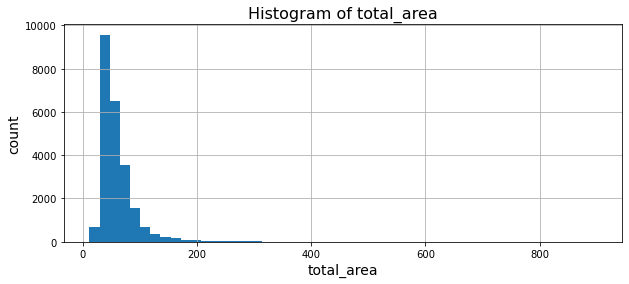

In [32]:
plot_my_hist(df['total_area'])

Для наглядности выведем график только для квартир с площадью меньше 150 метров, но видим, что есть квартиры площадью и больше 800 метров

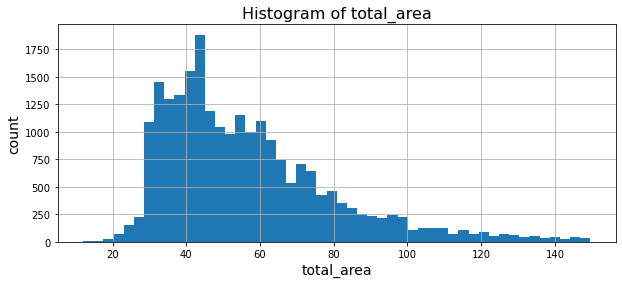

In [33]:
plot_my_hist(df.loc[df['total_area'] < 150, 'total_area'])

##### Вывод:

Больше всего квартир в диапазоне 30-60 метров, с максимумом в диапазоне 40-45 метров

#### Построим гистограмму цены квартир

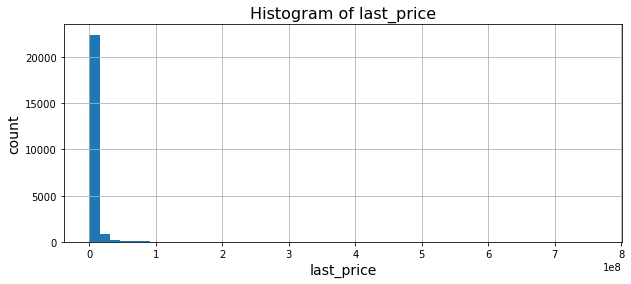

In [34]:
plot_my_hist(df['last_price'])

Видим, что больше часть значений умещается в первые столбцы гистограммы, поэтому построим график для значений до 30000000

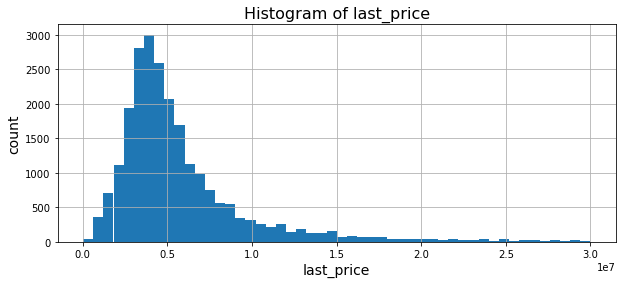

In [35]:
plot_my_hist(df.loc[df['last_price'] < 30000000, 'last_price'])

##### Вывод:

В приниципе, график похож на нормальное распределение с длинным хвостом в сторону аномально дорогих квартир. Видим максимум числа объявлений с ценой квартиры около 3.75 миллионов рублей

#### Построим гистограмму числа комнат

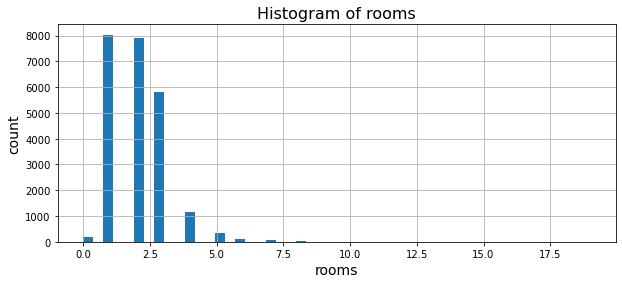

In [36]:
plot_my_hist(df['rooms'])

Видим, что квартиры с числом комнат больше 4 очень мало, а больше 6 совсем почти нет. Число комнат больше 9 очень редки и похожи на выбросы. Сделаем график понагляднее

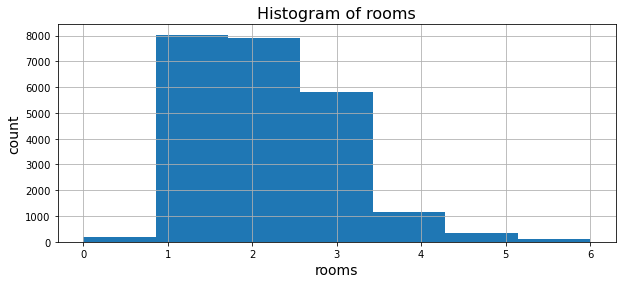

In [37]:
plot_my_hist(df.loc[df['rooms'] <= 6, 'rooms'], custom_bins=7)

##### Вывод:

В основном продают 1-2 комнатные квартиры, так же видим, что есть выбросы в числе комнат до 20, а в каких-то объявлениях указано 0 комнат (это может быть свободная планировка, но не будем сейчас это проверять)

#### Построим гистограмму высоты потолков

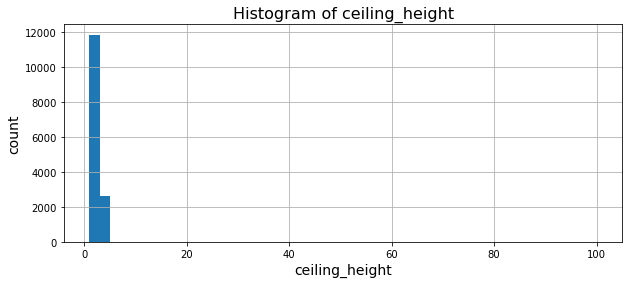

In [38]:
plot_my_hist(df.loc[~df['ceiling_height'].isna(),'ceiling_height'])

Очевидно у нас тут какие то выбросы. Посмотрим, что за значения высотки потолков больше 5м

In [39]:
df[df['ceiling_height'] > 5]['ceiling_height'].sort_values(ascending=False)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
22938     27.0
10773     27.0
21824     27.0
4876      27.0
20478     27.0
5246      27.0
5807      27.0
17857     27.0
5669      26.0
18545     25.0
14382     25.0
11285     25.0
355       25.0
9379      25.0
4643      25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
17442      8.0
3474       8.0
20264      6.0
21227      5.8
1388       5.6
7578       5.5
1026       5.3
12628      5.3
464        5.2
Name: ceiling_height, dtype: float64

Предположим, что какие-то особенные квартиры, может быть двухуровневые, есть с потолками 5м, но 10м, 27м, то 100м явно что-то странное.

Построим гистограмму без аномальных значений с высотой потолков больше 5м и меньше 2.3м

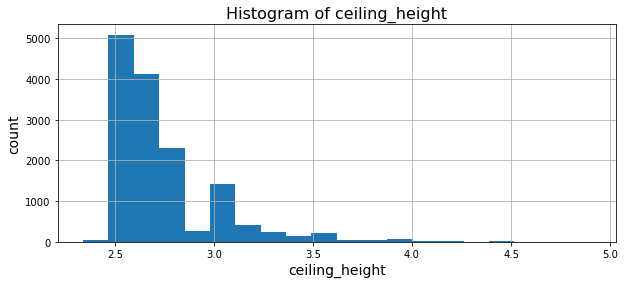

In [40]:
plot_my_hist(df.loc[(df['ceiling_height'].notna()) & (df['ceiling_height'] < 5) &(df['ceiling_height'] > 2.3), 'ceiling_height'], custom_bins=20)

##### Вывод:

Основное число квартир в диапазоне от 2.4м до 2.8м, а квартир с потолками больше 3м резко меньше, а более 4м почти нет. Так же заметим, что есть объявления в которых указаны аномальные значения типа 1м или 25м.

<a id="4.2"></a>
### 4.2 Изучение времени продажи квартир

Как мы помним, ранее заполнили пропуски во времени продажи квартир 0. Сложно представить, что квартира продалась в день подачи объявления, поэтому такие квартиры не будем рассматривать

In [41]:
days_exposition = df.loc[df['days_exposition'] > 0, 'days_exposition']

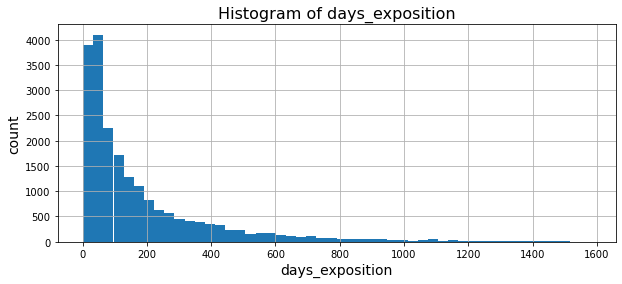

In [42]:
plot_my_hist(days_exposition)

Рассмотрим данные поближе

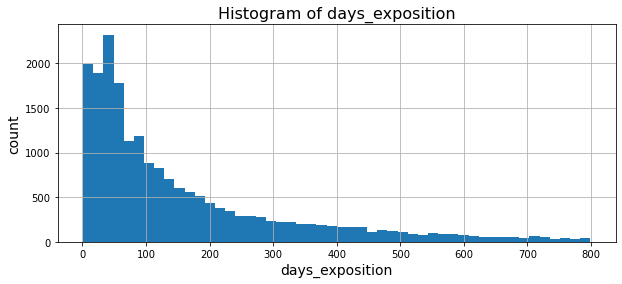

In [43]:
plot_my_hist(days_exposition[days_exposition < 800])

In [44]:
print('Среднее время продажи квартиры: {:0.0f} дней'.format(days_exposition.mean()))
print('Медианное время продажи квартиры: {:0.0f} дней'.format(days_exposition.median()))

Среднее время продажи квартиры: 181 дней
Медианное время продажи квартиры: 95 дней


##### Вывод:

Видим, что среднее значение и медианное отличаются почти в 2 раза, так как есть объявления которые вывешены на сайте очень долго, но таких объявлений не так много. В оценки времени продажи лучше использовать медианное значение в 95 дней. Анализируя график можно сделать вывод, что если квартира продаётся больше года, то это необычно долго, а если менее 50 дней, то это довольно быстро. 

<a id="4.3"></a>
### 4.3 Удаление редких и выбивающихся значений

Избавимся от объявлений в которых:
* 0 комнат
* более 6 комнат
* высота потолков более 4 метра
* высота потолков менее 2.4 метра
* цена более 20000000
* время продажи более 365 дней

In [45]:
df = df.query(
    'rooms <= 6 and rooms > 0 and '
    'ceiling_height < 4.0 and ceiling_height > 2.3 and '
    'last_price < 20000000 and '
    'days_exposition < 365'
)

In [46]:
print('После очистки осталось {} объявлений'.format(df.shape[0]))

После очистки осталось 11988 объявлений


<a id="4.4"></a>
### 4.4 Изучение факторов влияющих на цену квартиры

#### Зависимость цены от площади квартиры

In [47]:
def plot_my_scatter(data=None, x=None, y=None, alpha=None):
    plt.figure(figsize=(10,4))
    plt.title('Does '+x+' affect '+y+'?', fontsize=16)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.scatter(data[x], data[y], alpha=alpha)
    plt.grid(True)
    plt.show()

In [48]:
def plot_my_pivot(data):
    plt.figure(figsize=(10,4))
    plt.title('Does '+data.index.name+' affect '+data.columns[0]+'?', fontsize=16)
    plt.xlabel(data.index.name, fontsize=14)
    plt.ylabel(data.columns[0], fontsize=14)
    ax = plt.axes()
    ax.plot(data.index, data.values)
    plt.grid(True)
    plt.show()

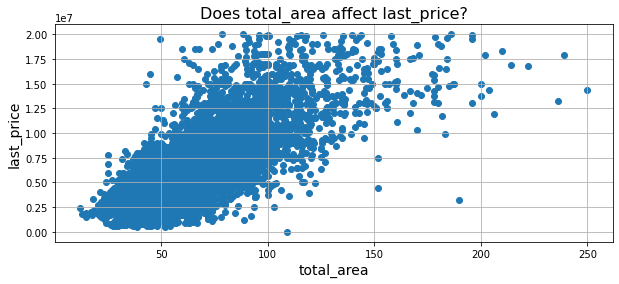

In [49]:
plot_my_scatter(df, 'total_area', 'last_price')

Видна прямая положительная зависимость цены квартиры от её площади, хотя есть и выбивающиеся из этой зависимости объявления

#### Зависимость цены от числа комнат

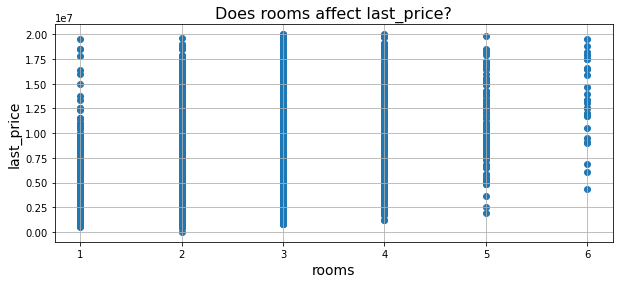

In [50]:
plot_my_scatter(df, 'rooms', 'last_price')

Такой график не очень наглядный. Сгруппируем данные по числу комнат.

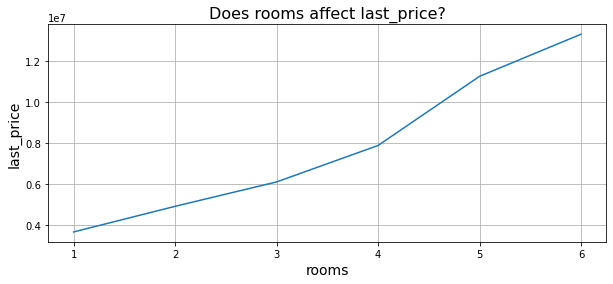

In [51]:
plot_my_pivot(
    data= df.pivot_table(index='rooms', values='last_price', aggfunc='median')
)

Видим прямая положительную зависимость цены квартиры от её площади. Причём после для квартир с числом комнат больше 4 видно ускорение роста стоимости, так как такие квартиры чаще являются более премиального сегмента.

#### Зависимость цены от удалённости от центра

Мы не заполняли пропущенные значения в столбце удалённость от центра, поэтому построим график исключив строки где эти значения пропущены

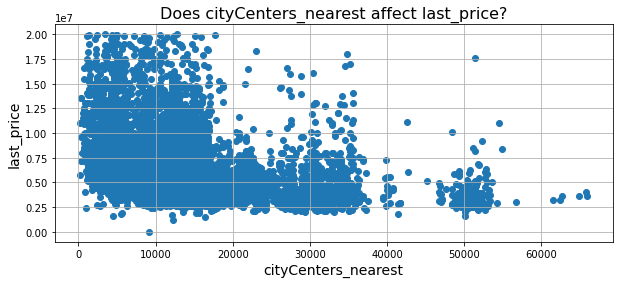

In [52]:
plot_my_scatter(df[df['cityCenters_nearest'].notna()], 'cityCenters_nearest', 'last_price')

Видим, что зависимость между удалённостью и ценной прослеживается, что, в целом, чем дальше от центра, тем дешевле квартира. Но по каждому населённому пункту может получится разная зависимость, поэтому рассмотрим отдельно для Санкт-Петербурга.

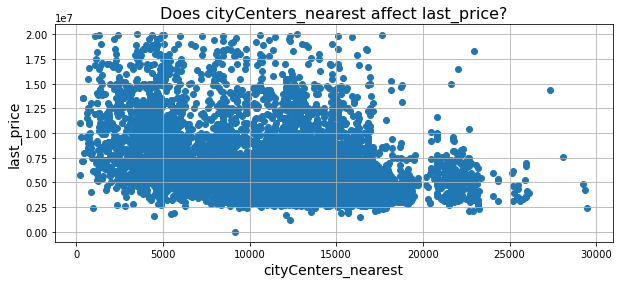

In [53]:
plot_my_scatter(
    df[df['cityCenters_nearest'].notna() & (df['locality_name'] == 'Санкт-Петербург')],
    'cityCenters_nearest',
    'last_price'
)

Попробуем изменить прозрачность точек на графике

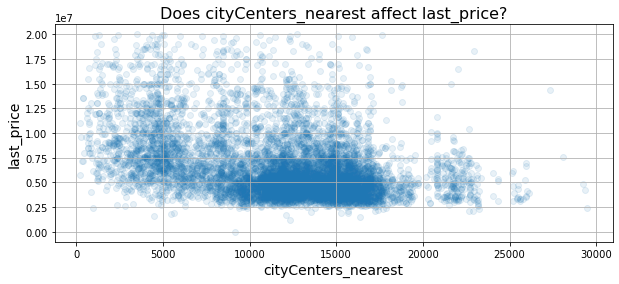

In [54]:
plot_my_scatter(
    df[df['cityCenters_nearest'].notna() & (df['locality_name'] == 'Санкт-Петербург')],
    'cityCenters_nearest',
    'last_price',
    alpha=0.1
)

Можно сделать вывод о зависимости цены от удалённости от центра, но разброс цен на каждом расстоянии очень большой. Возможно этот параметр стоит использовать сгруппировав по другому параметру, который сильнее влияет на цену (например, по площади).

#### Зависимость цены от этажа

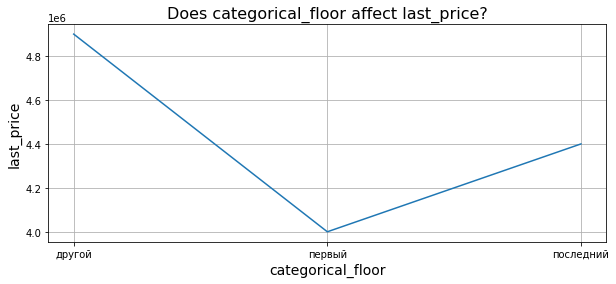

In [55]:
plot_my_pivot(
    df.pivot_table(index='categorical_floor', values='last_price', aggfunc='median')
)

Делаем вывод, что, при прочих равных, квартиры на последнем этаже дешевле, а на первом этаже самые дешёвые квартиры

#### Зависимость цены от  даты размещения

Построим графика цены от:
* дня недели
* месяца
* года

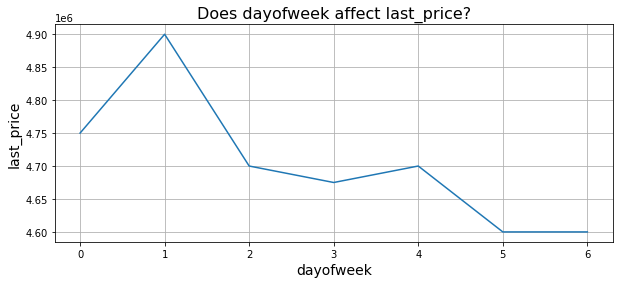

In [56]:
plot_my_pivot(
    df.pivot_table(index='dayofweek', values='last_price', aggfunc='median')
)

Можно заметить, что дороже всего квартиры размещённые во вторник и, что, в выходные размещают квартиры дешевле, чем в будни.

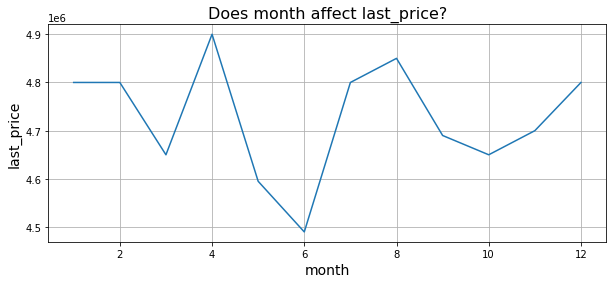

In [57]:
plot_my_pivot(
    df.pivot_table(index='month', values='last_price', aggfunc='median')
)

В общем и целом, зависимость не прослеживается, но есть некоторый спад медианной цены в июне

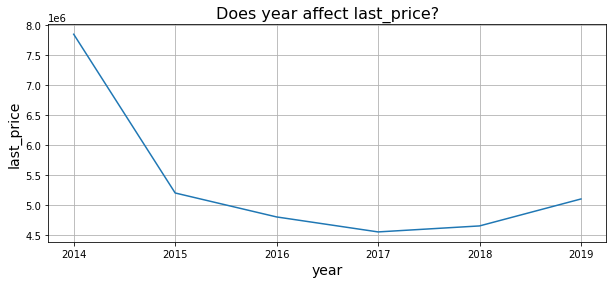

In [58]:
plot_my_pivot(
    df.pivot_table(index='year', values='last_price', aggfunc='median')
)

На графике зависимости цены от года в котором размещено объявление можно заметить резкий спад средней цены с 2014 года и постепенной восстановление цены с 2017 года

<a id="4.4"></a>
### 4.4 Средняя цена квартиры в топ-10 населённых пунктах по числу объявлений

Выделим топ-10 населённых пунктов по числу объявлений

In [59]:
top10_locality = df.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10)
top10_locality

locality_name
Санкт-Петербург      8260
Всеволожск            229
Пушкин                197
посёлок Шушары        194
Колпино               183
посёлок Мурино        167
Гатчина               126
посёлок Парголово     126
Петергоф              119
Сестрорецк            108
Name: last_price, dtype: int64

Считаем именно среднюю цену квадратного метра в 10 выделенных населённых пунктах

In [60]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.query('locality_name in @top10_locality.index').pivot_table(index='locality_name', values='last_price', aggfunc='mean').sort_values(by='last_price')

,last_price
locality_name,
Гатчина,3598095.714
Всеволожск,3911904.742
посёлок Мурино,3943019.102
Колпино,3967807.224
посёлок Шушары,4274470.098
Петергоф,4370201.681
посёлок Парголово,4489412.690
Пушкин,5683698.670
Сестрорецк,6368006.481


##### Вывод:
* cамое дорогое жильё в Санкт-Петербурге
* самое дешёвое жилье в Гатчине

<a id="4.5"></a>
### 4.5 Определение центральной зоны Санкт-Петербурга

Выделим объявления в Санкт-Петербурге в которых указано расстояние до центра

In [61]:
df_sp = df[(df['locality_name'] == 'Санкт-Петербург') & df['cityCenters_nearest'].notna()]

Создаём новый столбец с округлением расстояния до 1 км

In [62]:
df_sp['cityCenters_nearest_km'] = round(df_sp['cityCenters_nearest'] / 1000)
df_sp['cityCenters_nearest_km'] = df_sp['cityCenters_nearest_km'].astype('int')

Создадим таблицу где на каждое расстояние с точностью до 1км соответствует средняя цена за кв.м. квартиры

In [63]:
pivot_sp = df_sp.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')

Построим график

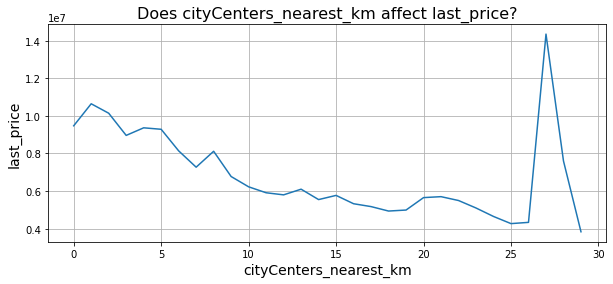

In [64]:
plot_my_pivot(pivot_sp)

Проверим будет ли отличаться график для медианной цены

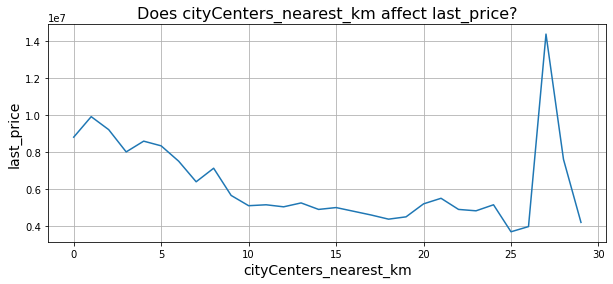

In [65]:
plot_my_pivot(
    df_sp.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
)

##### Вывод:
* центральной зоной примем расстояние от центра до 8км
* выявили аномальный рост средней стоимости жилья на расстоянии от центра в 26-27км

<a id="4.6"></a>
### 4.6 Анализ квартир в центре Санкт-Петербурга

In [66]:
df_sp_center = df_sp[df_sp['cityCenters_nearest_km'] <= 8]

Построим гистограмму общей площади

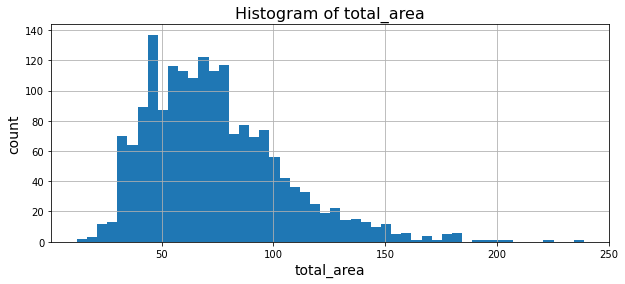

In [67]:
plot_my_hist(df_sp_center['total_area'])

Построим гистограмму числа комнат

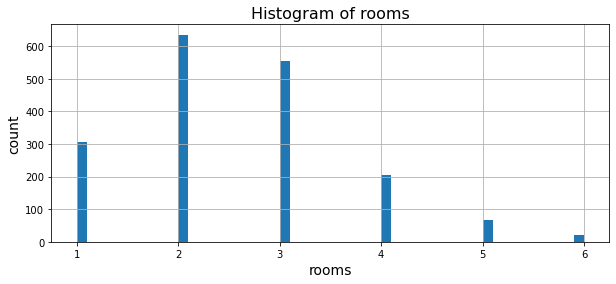

In [68]:
plot_my_hist(df_sp_center.loc[df['rooms'] <= 6, 'rooms'])

Построим гистограмму высоты потолков

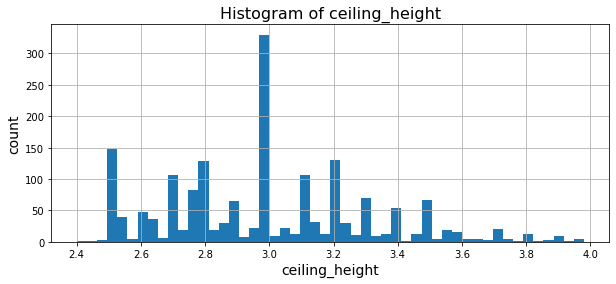

In [69]:
plot_my_hist(df_sp_center.loc[~df_sp_center['ceiling_height'].isna(),'ceiling_height'])

Проверим зависимость числа комнат на цену квартиры

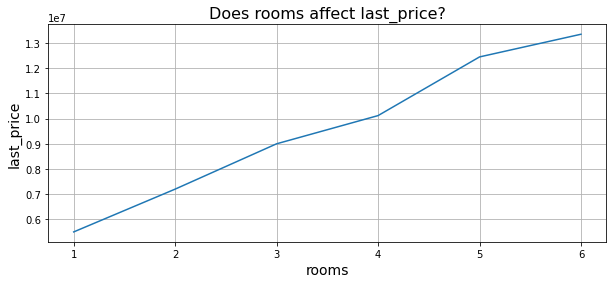

In [70]:
plot_my_pivot(
    df_sp_center.pivot_table(index='rooms', values='last_price', aggfunc='median')
)

Проверим зависимость этажа на цену квартиры в объявлении

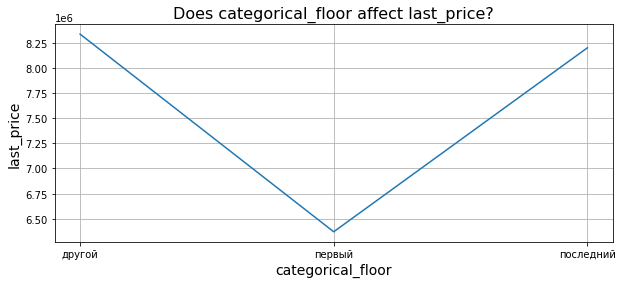

In [71]:
plot_my_pivot(
    df_sp_center.pivot_table(index='categorical_floor', values='last_price', aggfunc='median')
)

Проверим зависимость расположения квартиры от центра на цену квартиры

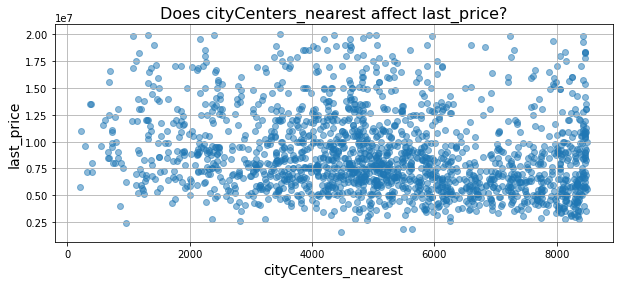

In [72]:
plot_my_scatter(
    df_sp_center,
    'cityCenters_nearest',
    'last_price',
    alpha=0.5
)

Проверим влияение даты размещения на цену квартиры

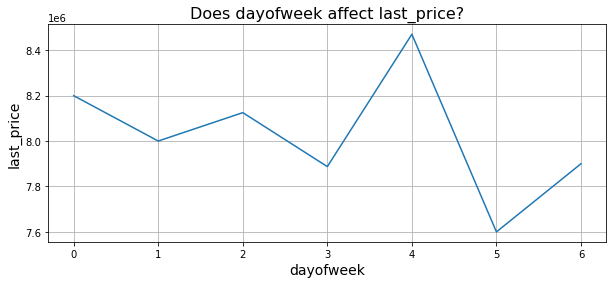

In [73]:
plot_my_pivot(
    df_sp_center.pivot_table(index='dayofweek', values='last_price', aggfunc='median')
)

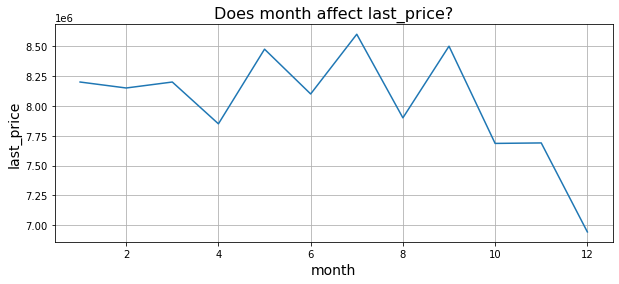

In [74]:
plot_my_pivot(
    df_sp_center.pivot_table(index='month', values='last_price', aggfunc='median')
)

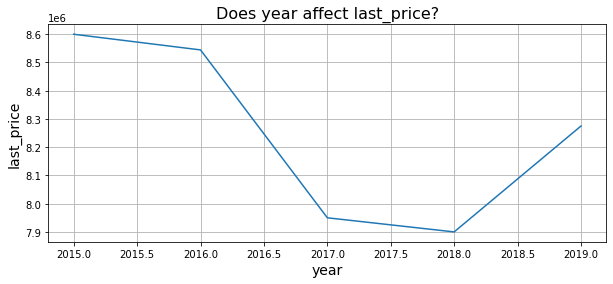

In [75]:
plot_my_pivot(
    df_sp_center.pivot_table(index='year', values='last_price', aggfunc='median')
)

##### Выводы:
* квартиры в центре больше по площади, медианная площадь около 75м
* в квартирых в центре выше потолки (около 3м)
* в квартирах в центре больше 3х и 4х комнатных квартир и меньше однокомнатных
* число комнат в квартире так же сильно влияет на цену квартиры
* дешевле всего квартиры на первом этаже, а вот цена квартир на последнем этаже уже не отличается от цены квартир на других этажах
* не прослеживается зависимость цены квартиры от близости к центру, видимо в центре города много точек притяжения рядом с которыми продаются дорогие квартиры
* есть некоторые перепады в цене квартиры от даты когда выложено объявление, но в виду малого числа объявлений затруднительно выявить явную закономерность, но:
    * видим резкое удешевление квартир после 2014 года, а вот восстановление цен с 2017 года уже более резкое, чем в целом по всем объявлениями
    * в объявлениях выложенных в выходные цена тоже несколько ниже

<a id="conclusion"></a>
### 5. Общий вывод

* выявлены пропуски данных,которые могли быть инициированы и ошибкой ввода пользователя и программной ошибкой
* выявлены и удалены аномальные значения
* выявлены параметры влиящие на цену квартиры:
    * общая площадь
    * число комнат
    * этаж квартиры
    * год размещения объявления
* выявлено отличие объявление в центре Санкт-Петербурга от всех объявлений:
    * площадь квартир, число комнат, высота потолков в среднем выше в центре Санкт-Петербурга
    * последний этаж в центре Санкт-Петербурга не снижает цену квартиры
    * цены на квартиры в центре быстрее восстановились после кризиса